# EMİN EREN SARI 
# 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn import svm
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import ttest_ind
warnings.filterwarnings("ignore")

# EDA

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose             

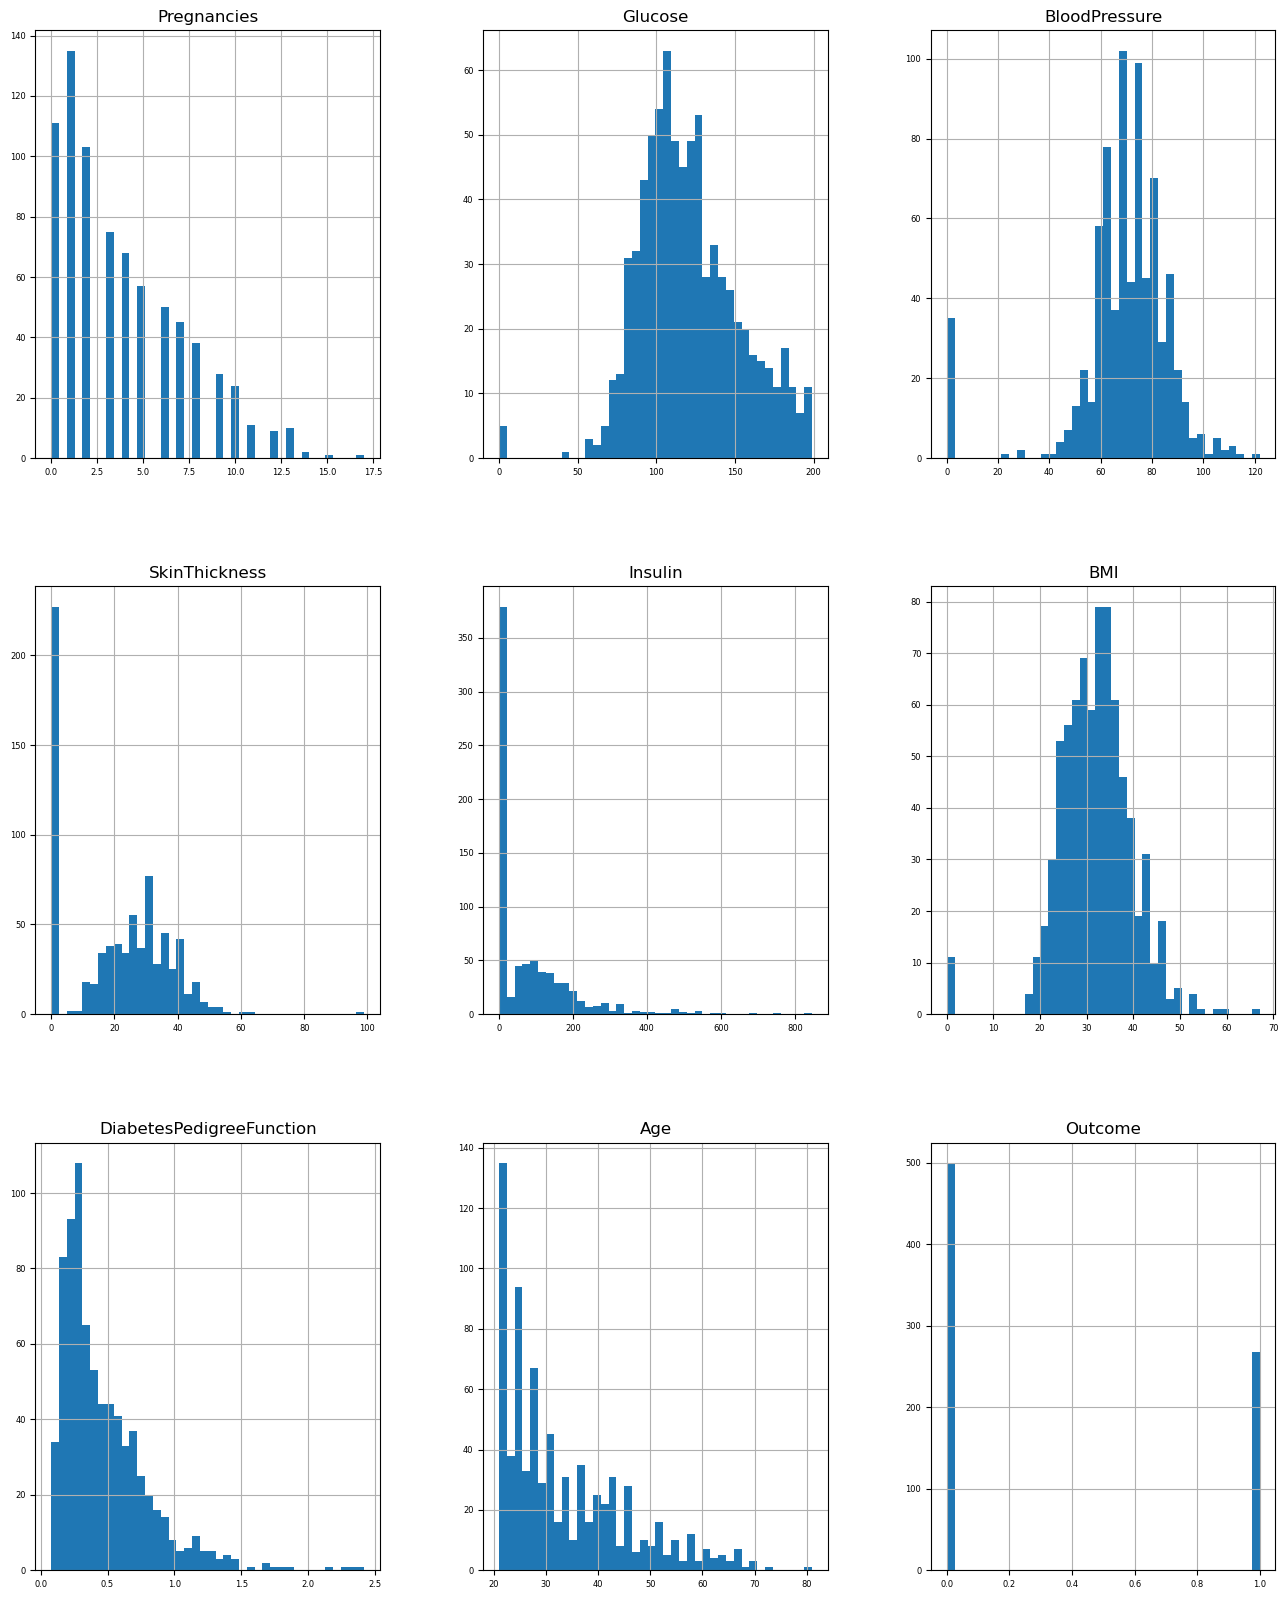

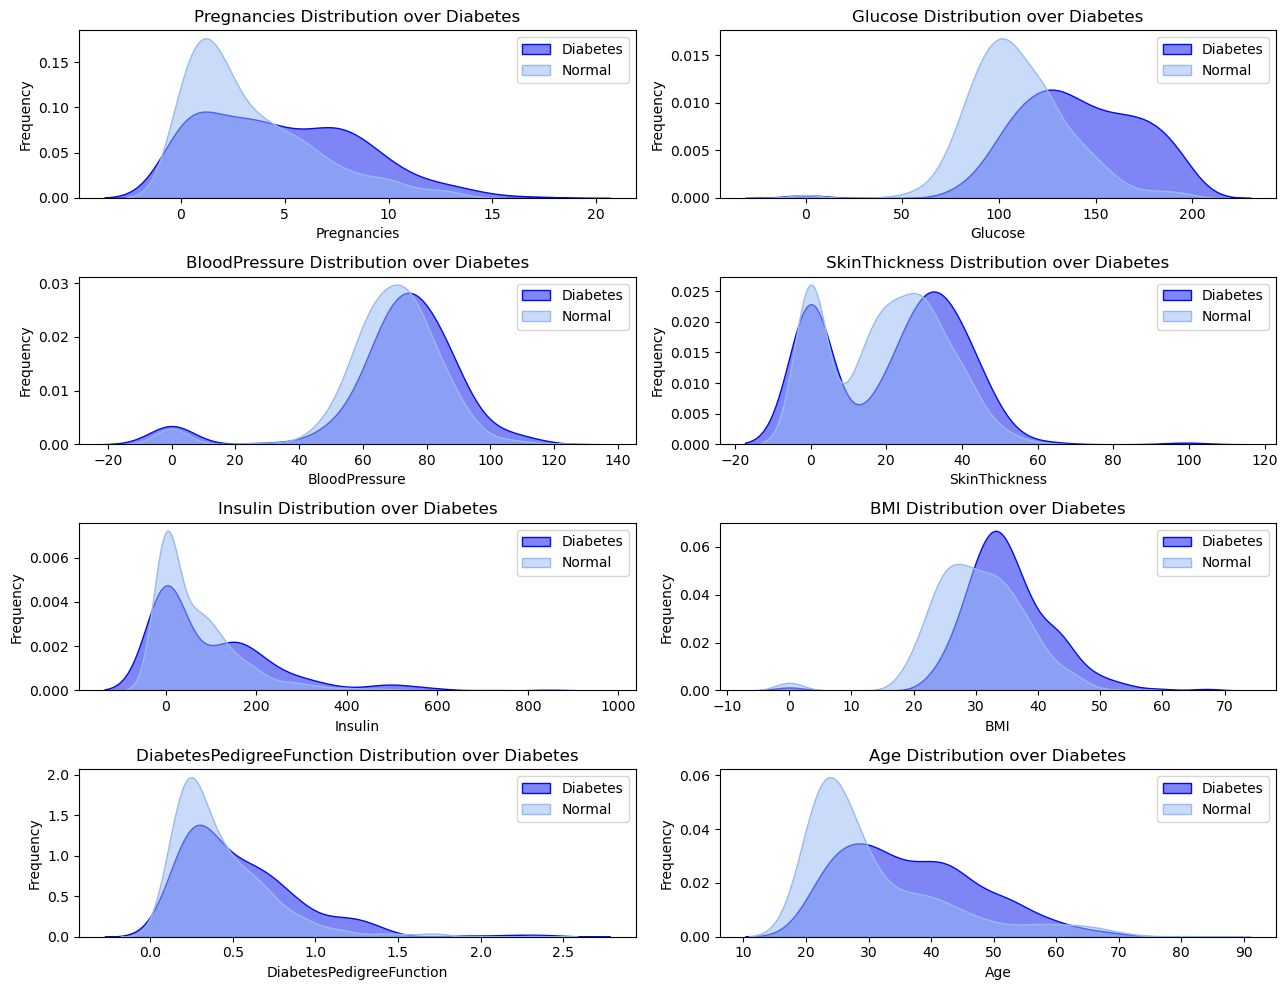

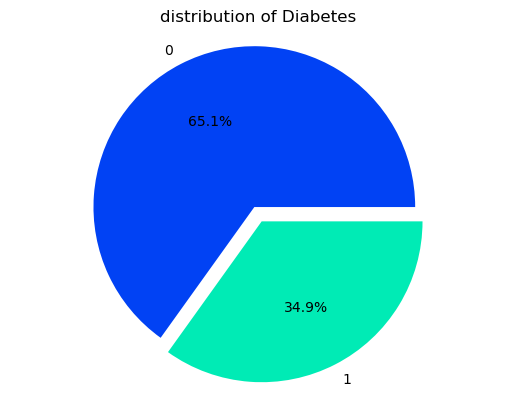

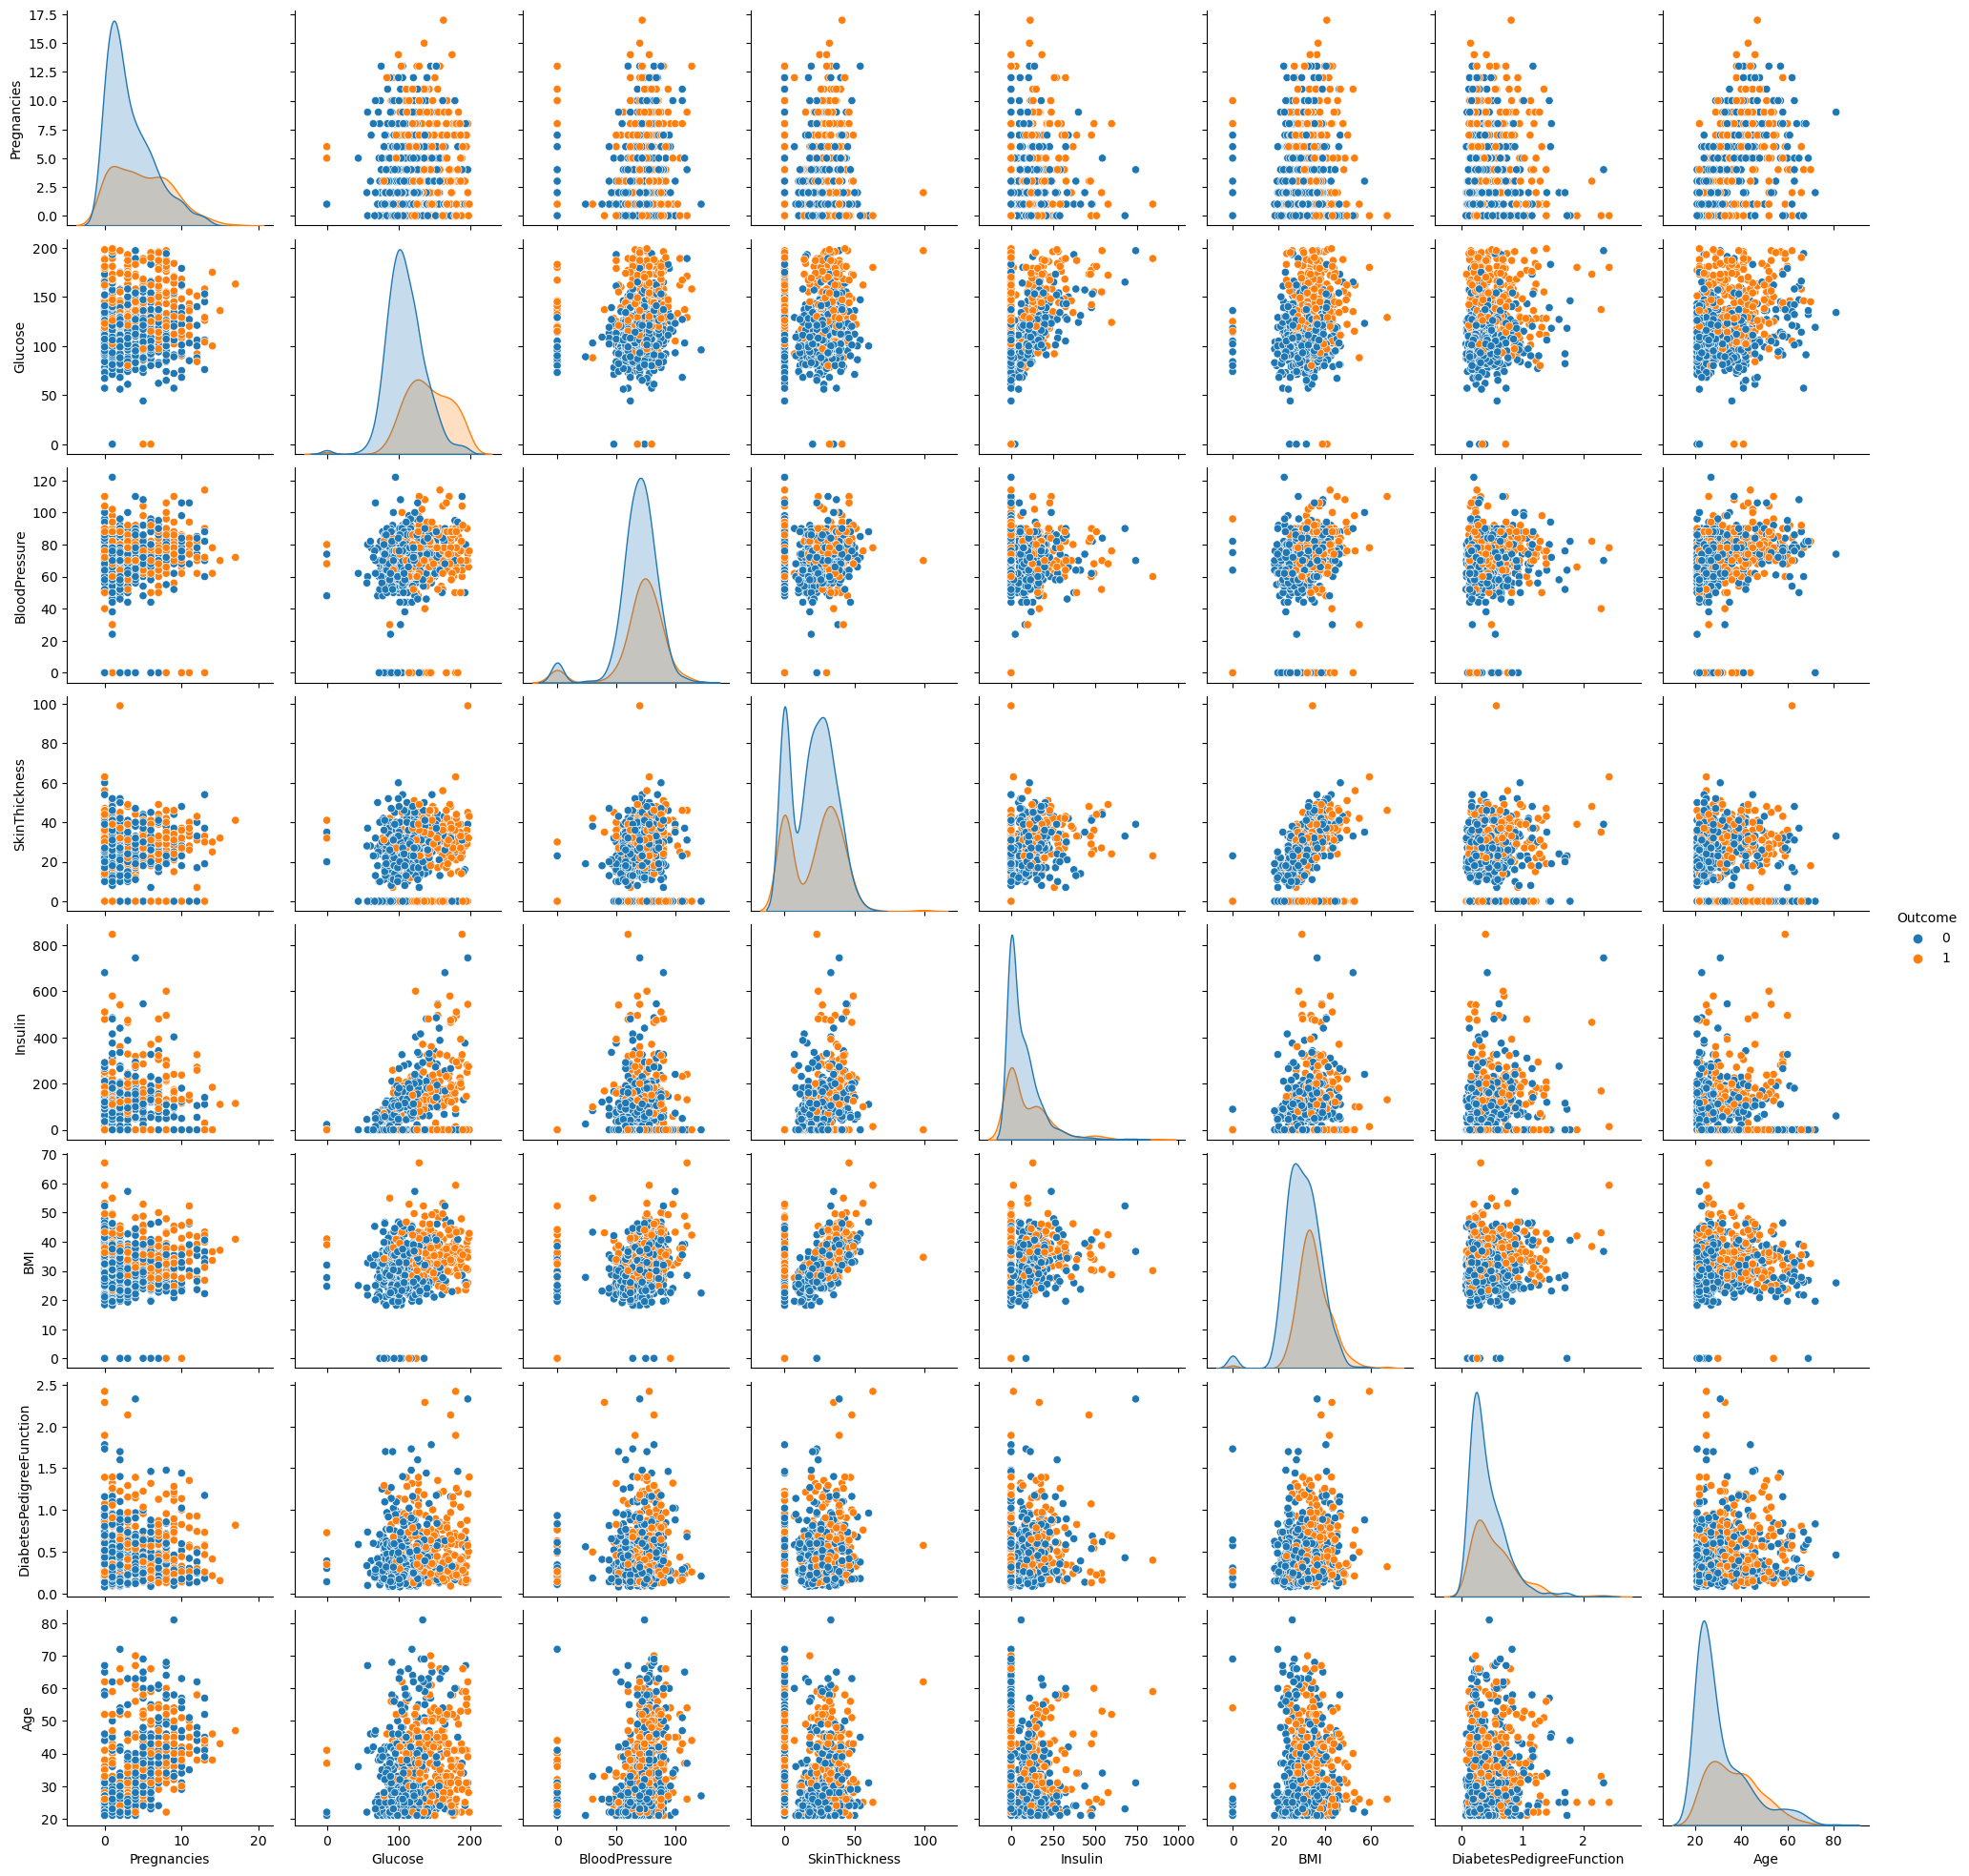

In [17]:
# Veriyi yükle
df = pd.read_csv('diabetes.csv')


print(df.head(5))

print(df.shape)

print(df.info())

df.describe()

# # **Calculate missing values**

print(df.isna().sum().sort_values(ascending=False).head(5))



# # **Data distribution**

df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

fig, axes = plt.subplots(nrows=len(df.columns) // 2, ncols=2, figsize=(13, 10))

for idx, column in enumerate(df.drop(columns='Outcome')):
    row_idx = idx // 2
    col_idx = idx % 2
    
    sns.kdeplot(df[df["Outcome"] == 1][column], alpha=0.5, fill=True, color="#000CEB", label="Diabetes", ax=axes[row_idx, col_idx])
    sns.kdeplot(df[df["Outcome"] == 0][column], alpha=0.5, fill=True, color="#97B9F4", label="Normal", ax=axes[row_idx, col_idx])
    
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel("Frequency")
    axes[row_idx, col_idx].set_title(f"{column} Distribution over Diabetes")
    axes[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

Diabetes_column = df.Outcome.value_counts()

# pie chart for target column
plt.pie(Diabetes_column, labels = Diabetes_column.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#0142F4","#00EBB5"])
plt.title("distribution of Diabetes")
plt.axis("equal")
plt.show()

sns.pairplot(df,hue='Outcome')


Korelasyon Analizi ve Pair-plot, heatmap

Korelasyon Matrisi:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

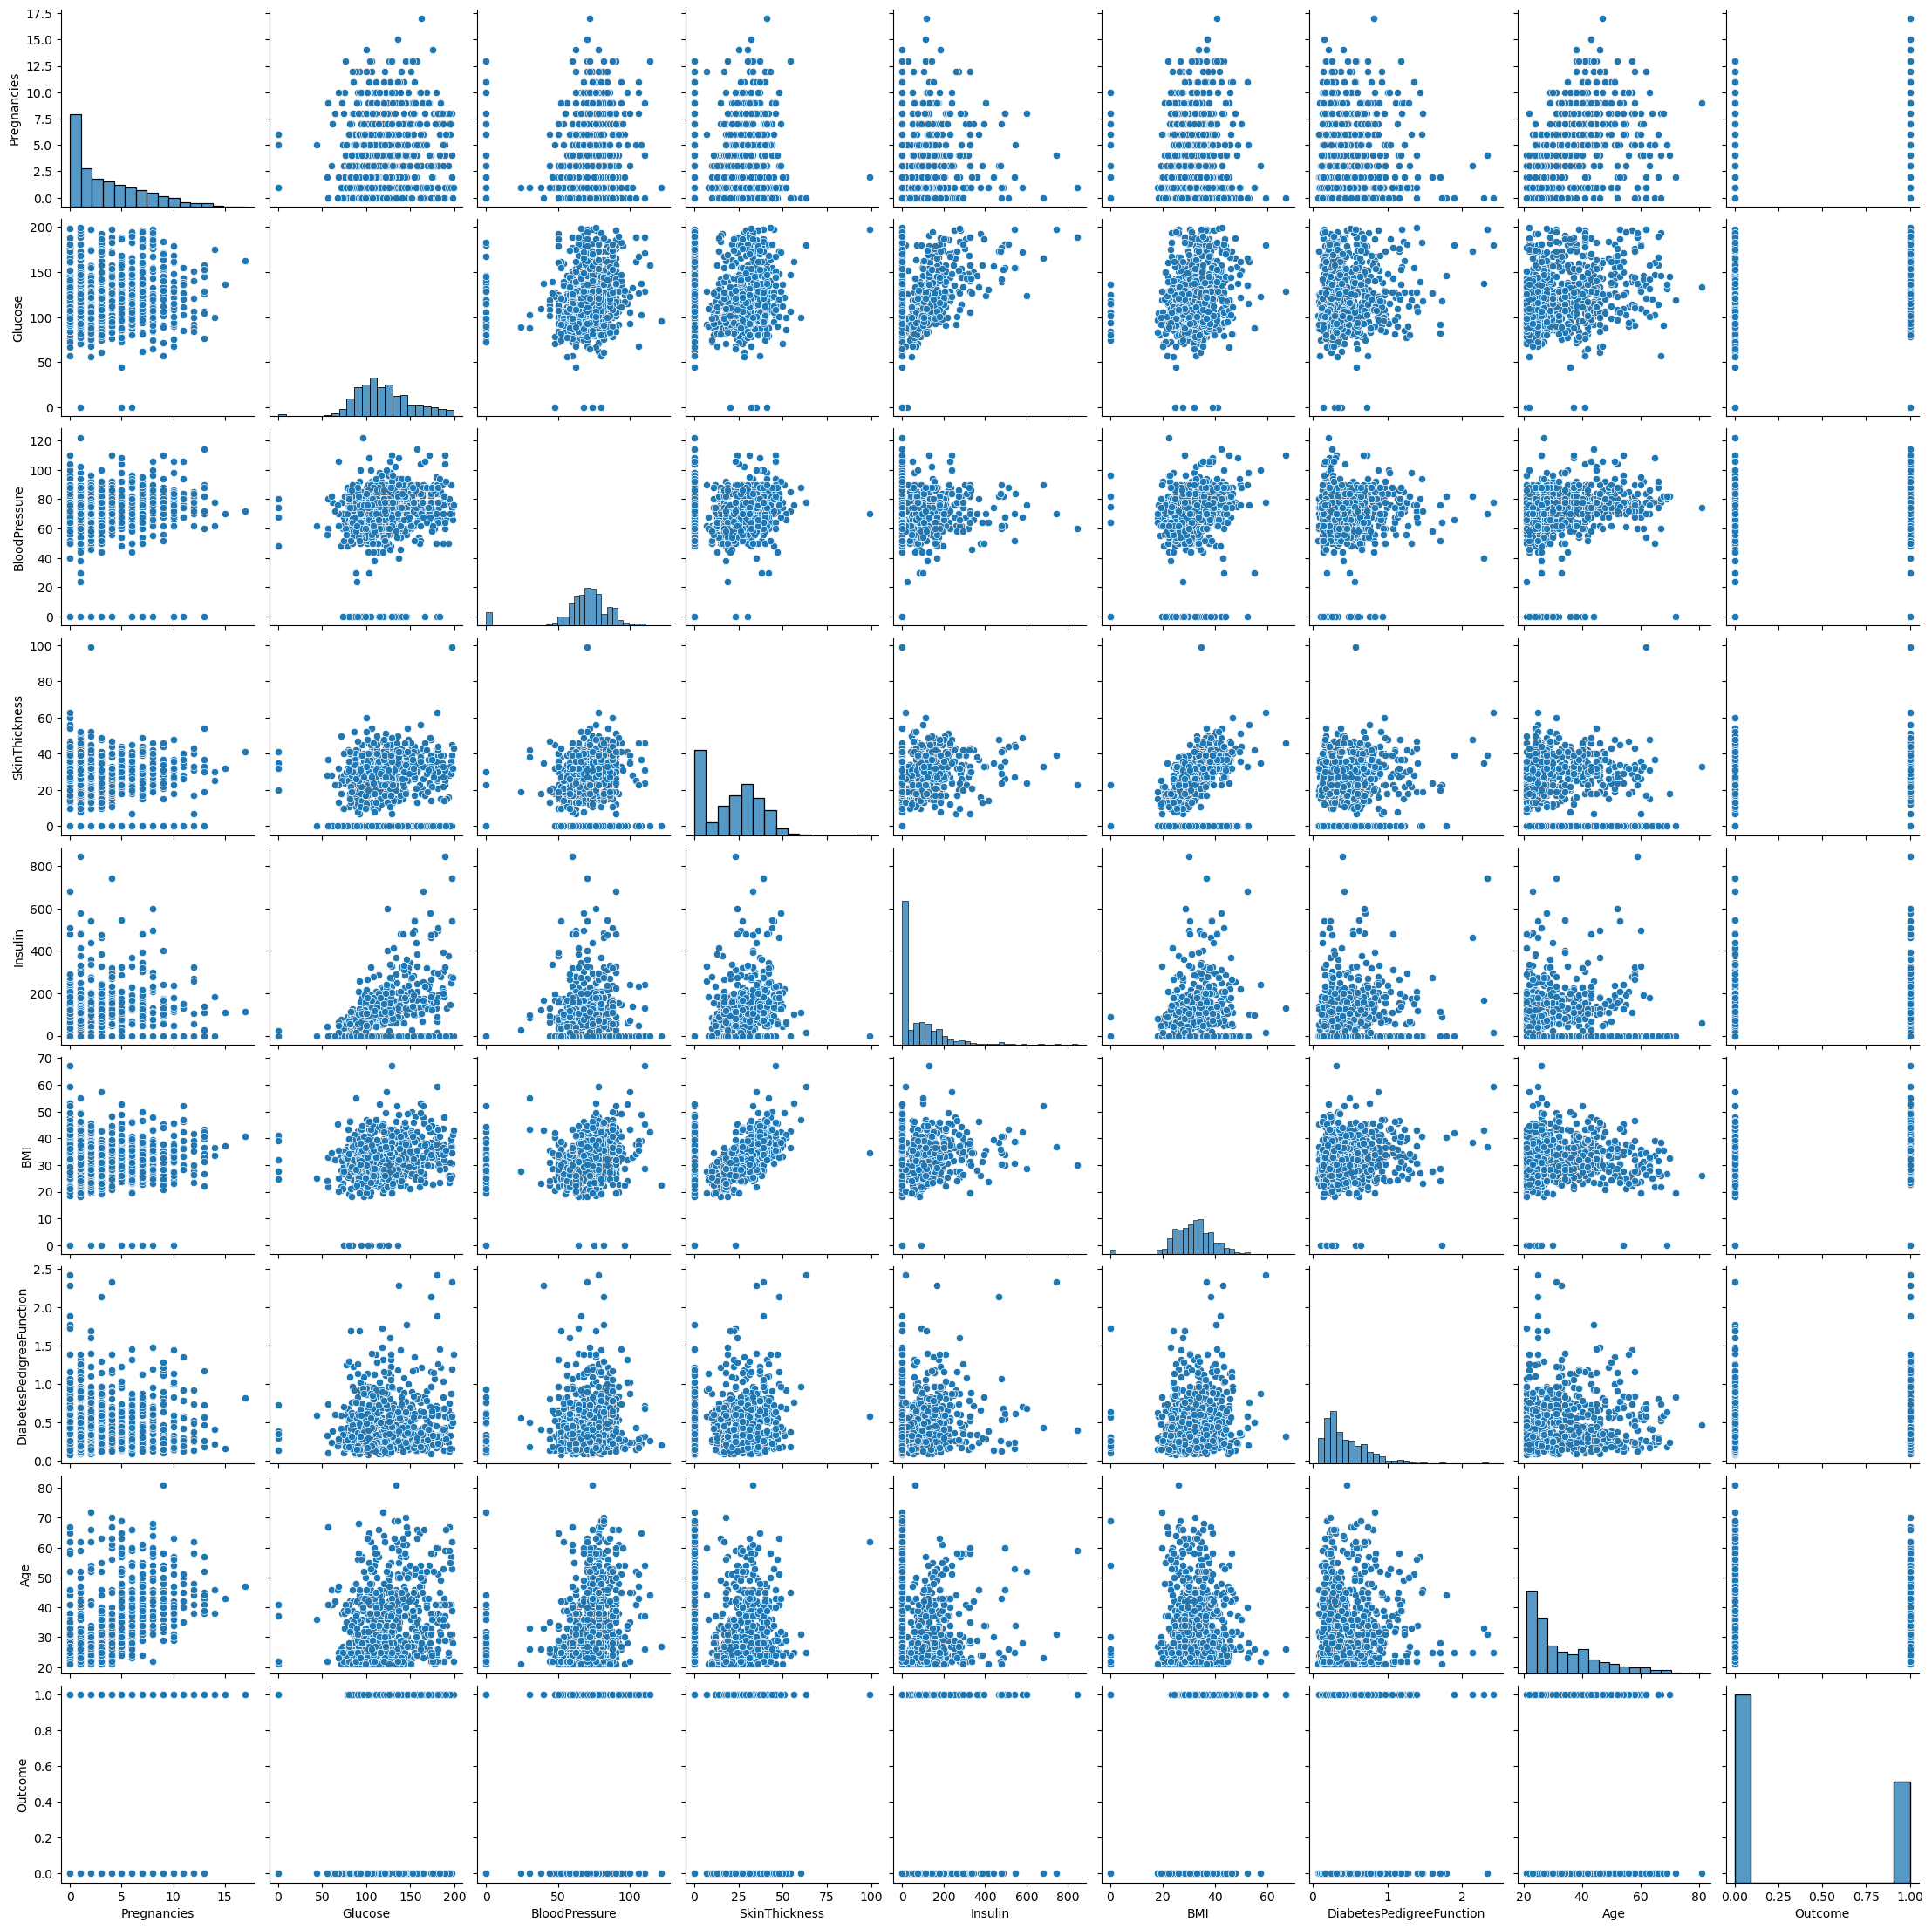

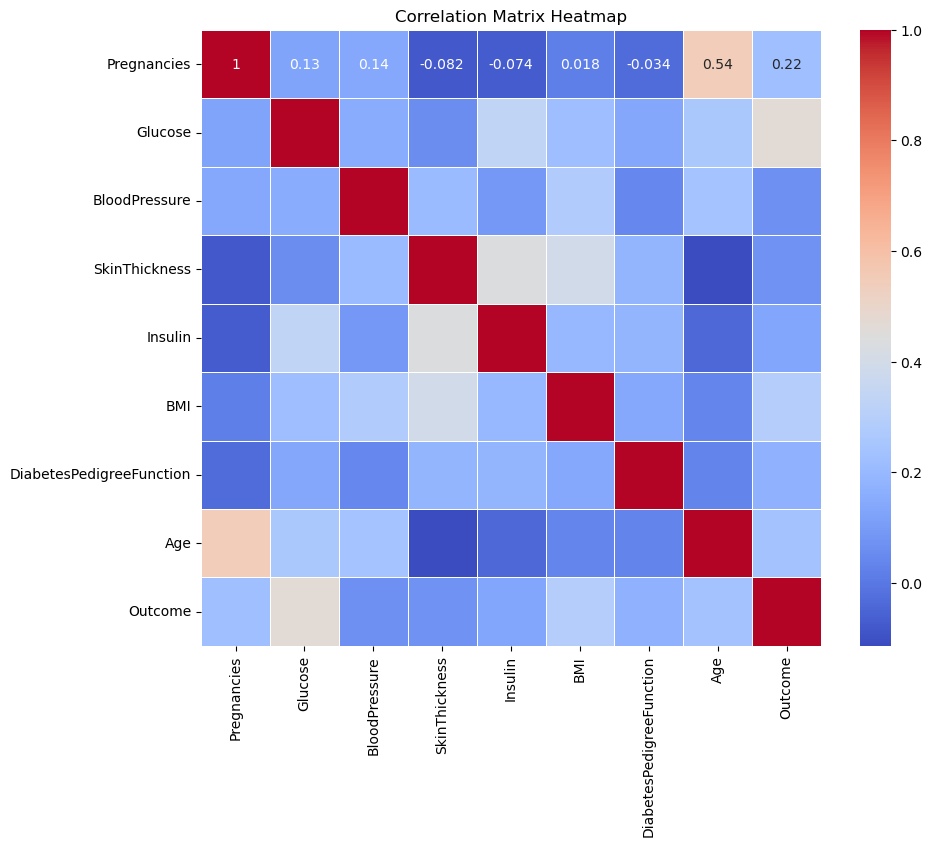

In [18]:
correlation_matrix = df.corr()
print("Korelasyon Matrisi:")
print(correlation_matrix)

sns.pairplot(df)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



Glukoz, BMI ve Yaşın Sonuç ile en fazla ilişkili olduğunu gözlemleyebiliriz. Kan Basıncı, İnsülin, Diyabet Soy Fonksiyonu en az ilişkili olanlardır.

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Age'>

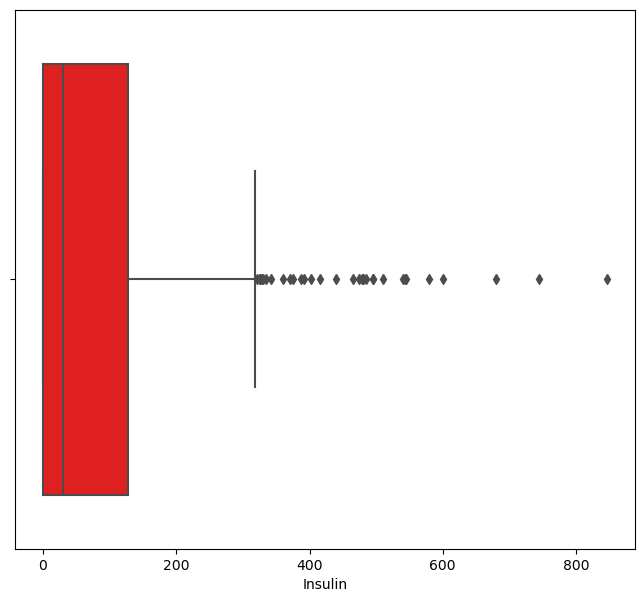

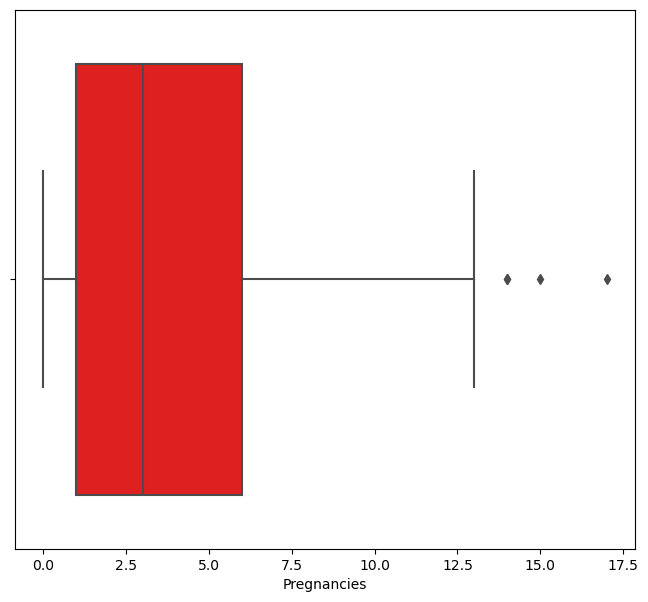

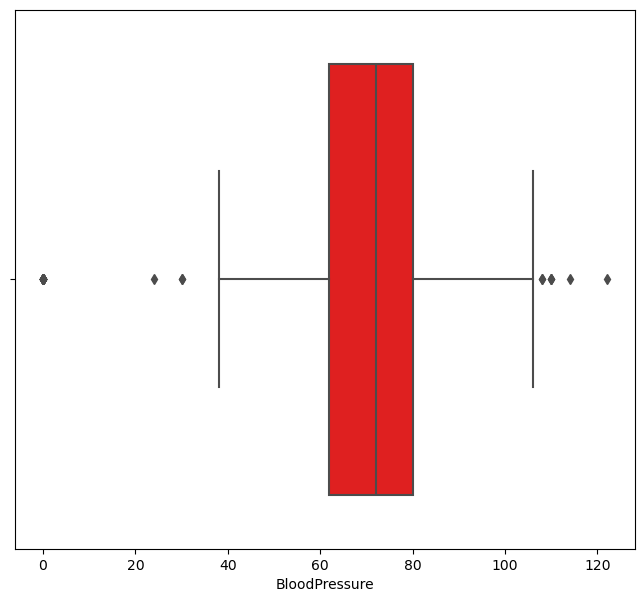

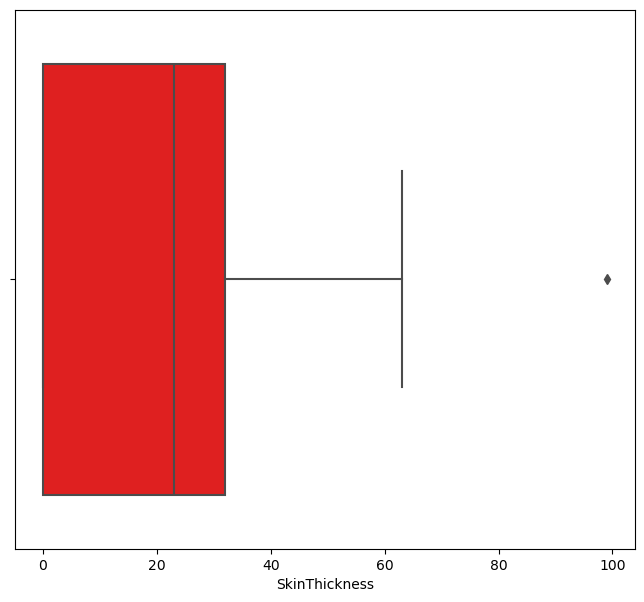

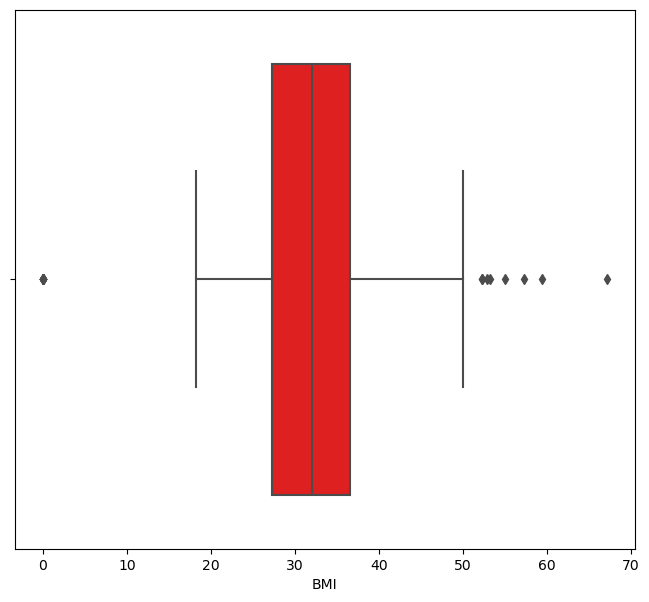

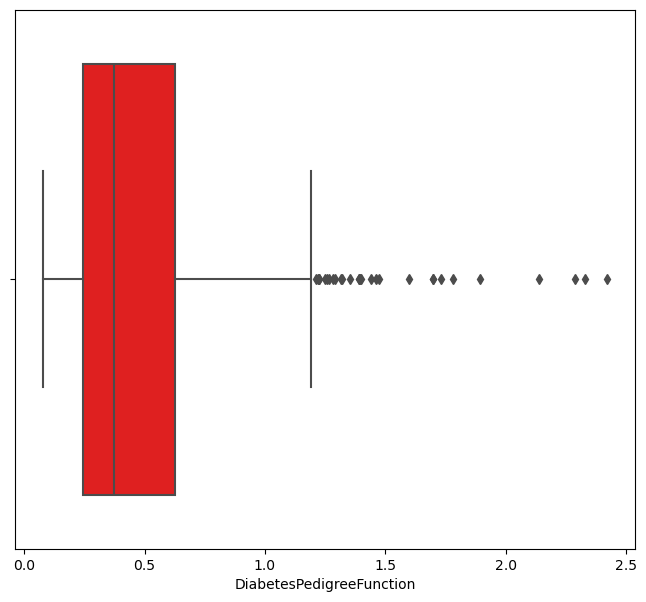

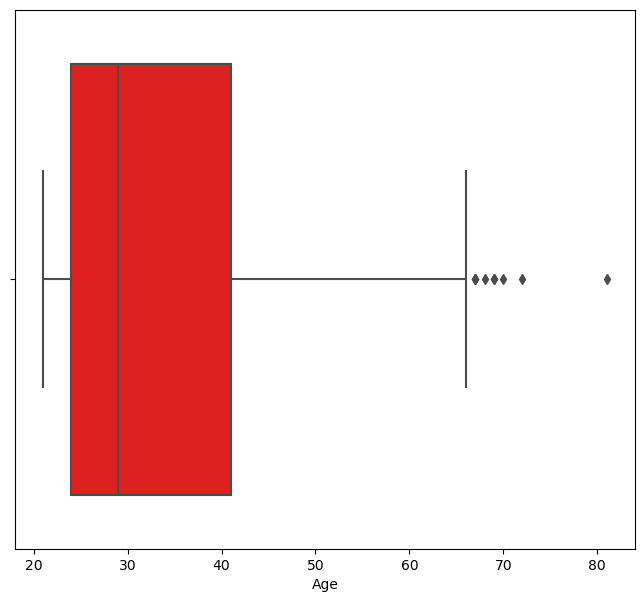

In [19]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BloodPressure"], color="red")
plt.figure(figsize=(8,7))
sns.boxplot(x= df["SkinThickness"], color="red")
plt.figure(figsize=(8,7))
sns.boxplot(x= df["BMI"], color="red")
plt.figure(figsize=(8,7))
sns.boxplot(x= df["DiabetesPedigreeFunction"], color="red")
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Age"], color="red")

Outlier'ları belirleme ve sınırlandırma fonksiyonları 
Eksik verileri median ve mean ile doldurma

In [20]:


def outlier_thresholds(dataframe, column, q1=0.25, q3=0.75):
    quartile1 = dataframe[column].quantile(q1)
    quartile3 = dataframe[column].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

def check_outlier(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    outliers = (dataframe[column] > up_limit) | (dataframe[column] < low_limit)
    if outliers.any():
        return True
    else:
        return False

def replace_with_thresholds(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
    dataframe.loc[(dataframe[column] > up_limit), column] = up_limit

# Outlier'ları kontrol et ve sınırlandır
for column in df.columns[:-1]:  # 'Outcome' dışındaki tüm sütunlar
    replace_with_thresholds(df, column)



#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution




# Veriyi ölçeklendir
scaler = MinMaxScaler()

df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


Eğitim

In [31]:
# Veri setini ayır
X = df.drop(columns='Outcome')
y = df['Outcome']

# Veriyi eğitim, çapraz doğrulama ve test setlerine böl
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

def define_models():
    models = {}
    
    # Logistic Regression
    models['Logistic Regression'] = Pipeline([
        ('pca', PCA(n_components=8)),
        ('select', SelectKBest(f_classif, k=6)),
        ('classifier', LogisticRegression(C=10))
    ])
    
    # Random Forest
    models['Random Forest'] = Pipeline([
        ('pca', PCA(n_components=8)),
        ('select', SelectKBest(f_classif, k=7)),
        ('classifier', RandomForestClassifier(n_estimators=200))
    ])
    
    # SVM
    models['SVM'] = Pipeline([
        ('pca', PCA(n_components=7)),
        ('select', SelectKBest(f_classif, k=6)),
        ('classifier', SVC(C=1, gamma='scale', probability=True))
    ])
    
    # KNeighbors
    models['KNeighbors'] = Pipeline([
        ('pca', PCA(n_components=7)),
        ('select', SelectKBest(f_classif, k=5)),
        ('classifier', KNeighborsClassifier(n_neighbors=7))
    ])
    
    # Gradient Boosting
    models['Gradient Boosting'] = Pipeline([
        ('pca', PCA(n_components=7)),
        ('select', SelectKBest(f_classif, k=5)),
        ('classifier', GradientBoostingClassifier(n_estimators=100))
    ])
    
    # XGBoost
    models['XGBoost'] = Pipeline([
        ('pca', PCA(n_components=7)),
        ('select', SelectKBest(f_classif, k=7)),
        ('classifier', xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'))
    ])
    
    # MLP Classifier (Neural Network)
    models['Neural Network'] = Pipeline([
        ('pca', PCA(n_components=7)),
        ('select', SelectKBest(f_classif, k=5)),
        ('classifier', MLPClassifier(hidden_layer_sizes=(50,), max_iter=300))
    ])
    
    # AdaBoost
    models['AdaBoost'] = Pipeline([
        ('pca', PCA(n_components=7)),
        ('select', SelectKBest(f_classif, k=7)),
        ('classifier', AdaBoostClassifier(n_estimators=50))
    ])
    
    # Stacking
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svr', SVC(probability=True, random_state=42))
    ]
    models['Stacking'] = Pipeline([
        ('pca', PCA(n_components=8)),
        ('select', SelectKBest(f_classif, k=7)),
        ('classifier', StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()))
    ])
    
    return models

# Model eğitimi ve değerlendirme
def train_and_evaluate_model(models, X_train, y_train, X_test, y_test):
    results = {}
    metrics = {}

    
    # Cross-validation ve model değerlendirme
    for name, model in models.items():
        print(f"Training {name}...")
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
        cross_val_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        print(f"{name} - Cross-validation accuracy: {cross_val_scores.mean():.4f} ± {cross_val_scores.std():.4f}")
        
        
        model.fit(X_train, y_train)
        
        # Eğitim verileri
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        
        # Test verileri
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        # Precision, Recall, F1-Score hesaplamaları
        precision = precision_score(y_test, test_pred)
        recall = recall_score(y_test, test_pred)
        f1 = f1_score(y_test, test_pred)
        
        
        results[name] = {
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Train AUC': train_auc,
            'Test AUC': test_auc
        }
        
        metrics[name] = {
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }
        
        
        print(f"{name} - Test Accuracy: {test_accuracy:.4f}, Test AUC: {test_auc:.4f}")
        print(f"{name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    
    return results


Modeller için en iyi parametre ne onu tespit etmek için GridSearchCV ile buldum.
Burdan çıkan sonuçlara göre modellerin parametrelerini düzenledim.
Tekrar tekrar çalıştırmaya gerek olmadığı için burasını çalıştırmıyorum.

In [22]:
'''

models = define_models()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV ile en iyi hiperparametreleri bulma
best_params = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    model.fit(X_train, y_train)
    best_params[name] = model.best_params_
    print(f"Best parameters for {name}: {model.best_params_}")

# En iyi parametreleri yazdırma
print("Best Hyperparameters:")
for name, params in best_params.items():
    print(f"{name}: {params}")
'''


'\n\nmodels = define_models()\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# GridSearchCV ile en iyi hiperparametreleri bulma\nbest_params = {}\nfor name, model in models.items():\n    print(f"Optimizing {name}...")\n    model.fit(X_train, y_train)\n    best_params[name] = model.best_params_\n    print(f"Best parameters for {name}: {model.best_params_}")\n\n# En iyi parametreleri yazdırma\nprint("Best Hyperparameters:")\nfor name, params in best_params.items():\n    print(f"{name}: {params}")\n'

Verinin	görsel	olarak	2-D	gösterimi

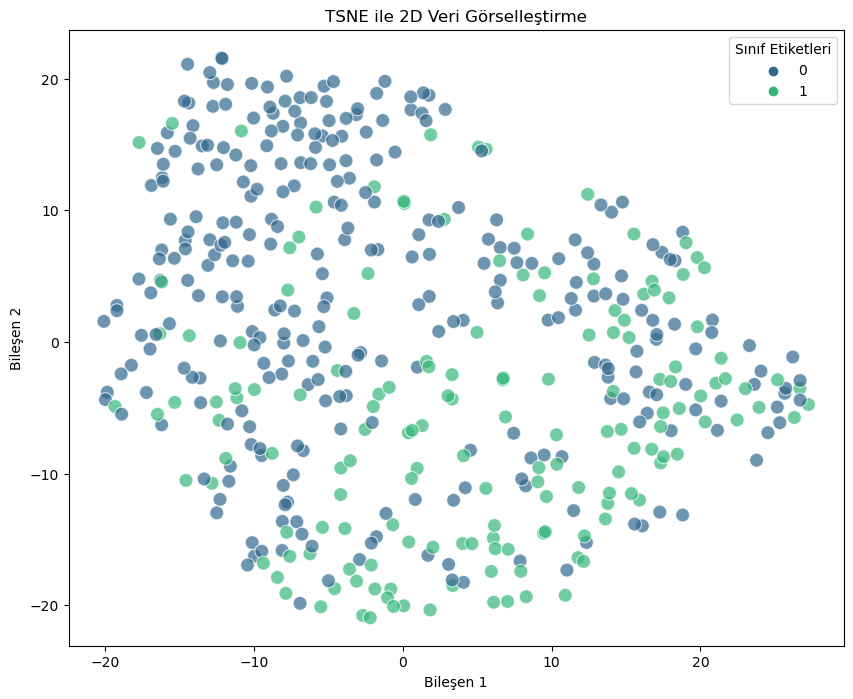

In [23]:
def visualize_2d_data(X, y):
    
    
    reducer = TSNE(n_components=2, random_state=42)
   
    
    X_reduced = reducer.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y, palette='viridis', s=100, alpha=0.7)
    plt.title(f"TSNE ile 2D Veri Görselleştirme")
    plt.xlabel('Bileşen 1')
    plt.ylabel('Bileşen 2')
    plt.legend(title='Sınıf Etiketleri')
    plt.show()

visualize_2d_data(X_train, y_train)




Sonuçları grafik olarak göstermek için

In [24]:





# Sonuçları görselleştir
def plot_results(results):
    df = pd.DataFrame(results).T
    df = df.sort_values(by='Test Accuracy', ascending=False)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    sns.barplot(x=df.index, y='Train Accuracy', data=df, ax=axes[0, 0], palette='Blues_d')
    axes[0, 0].set_title('Train Accuracy by Model')
    axes[0, 0].set_xlabel('Model')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Bar üstü değerler
    for p in axes[0, 0].patches:
        axes[0, 0].annotate(format(p.get_height(), '.5f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 9), 
                            textcoords='offset points')

    sns.barplot(x=df.index, y='Test Accuracy', data=df, ax=axes[0, 1], palette='Blues_d')
    axes[0, 1].set_title('Test Accuracy by Model')
    axes[0, 1].set_xlabel('Model')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Bar üstü değerler
    for p in axes[0, 1].patches:
        axes[0, 1].annotate(format(p.get_height(), '.5f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 9), 
                            textcoords='offset points')

    sns.barplot(x=df.index, y='Train AUC', data=df, ax=axes[1, 0], palette='Reds_d')
    axes[1, 0].set_title('Train AUC by Model')
    axes[1, 0].set_xlabel('Model')
    axes[1, 0].set_ylabel('AUC')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Bar üstü değerler
    for p in axes[1, 0].patches:
        axes[1, 0].annotate(format(p.get_height(), '.5f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 9), 
                            textcoords='offset points')

    sns.barplot(x=df.index, y='Test AUC', data=df, ax=axes[1, 1], palette='Reds_d')
    axes[1, 1].set_title('Test AUC by Model')
    axes[1, 1].set_xlabel('Model')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Bar üstü değerler
    for p in axes[1, 1].patches:
        axes[1, 1].annotate(format(p.get_height(), '.5f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', 
                            xytext=(0, 9), 
                            textcoords='offset points')

    plt.tight_layout()
    plt.show()


# ROC eğrilerini görselleştir
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)  # AUC değerini hesapla
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')  # AUC değerini etikete ekle
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()




Öznitelik Önemi

In [25]:
def plot_feature_importance(models, X_train):
    for name, model in models.items():
        # SelectKBest ile seçilen öznitelikler
        selectkbest = model.named_steps['select']
        selected_features = selectkbest.get_support(indices=True)
        
        # Seçilen öznitelik adlarını elde et
        feature_names = X_train.columns[selected_features]
        
        # Model öznitelik önemlerini al
        classifier = model.named_steps['classifier']
        
        if hasattr(classifier, 'feature_importances_'):
            importances = classifier.feature_importances_
        elif hasattr(classifier, 'coef_'):
            importances = classifier.coef_.ravel()
        else:
            continue  # Eğer model bu özelliği desteklemiyorsa atla
        
        # Öznitelik önemini normalize et
        importances = np.abs(importances)
        indices = np.argsort(importances)
        
        # Öznitelik önemini çizdir
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance - {name}")
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel("Relative Importance")
        plt.show()
        
        

Sonuç Çıktıları

Training Logistic Regression...
Logistic Regression - Cross-validation accuracy: 0.7529 ± 0.0487
Logistic Regression - Test Accuracy: 0.7403, Test AUC: 0.8022
Logistic Regression - Precision: 0.6364, Recall: 0.6364, F1-Score: 0.6364
Training Random Forest...
Random Forest - Cross-validation accuracy: 0.7486 ± 0.0299
Random Forest - Test Accuracy: 0.7532, Test AUC: 0.7993
Random Forest - Precision: 0.6545, Recall: 0.6545, F1-Score: 0.6545
Training SVM...
SVM - Cross-validation accuracy: 0.7529 ± 0.0375
SVM - Test Accuracy: 0.7208, Test AUC: 0.7973
SVM - Precision: 0.6154, Recall: 0.5818, F1-Score: 0.5981
Training KNeighbors...
KNeighbors - Cross-validation accuracy: 0.7529 ± 0.0338
KNeighbors - Test Accuracy: 0.7468, Test AUC: 0.7750
KNeighbors - Precision: 0.6667, Recall: 0.5818, F1-Score: 0.6214
Training Gradient Boosting...
Gradient Boosting - Cross-validation accuracy: 0.7420 ± 0.0430
Gradient Boosting - Test Accuracy: 0.6948, Test AUC: 0.7594
Gradient Boosting - Precision: 0.5769, 

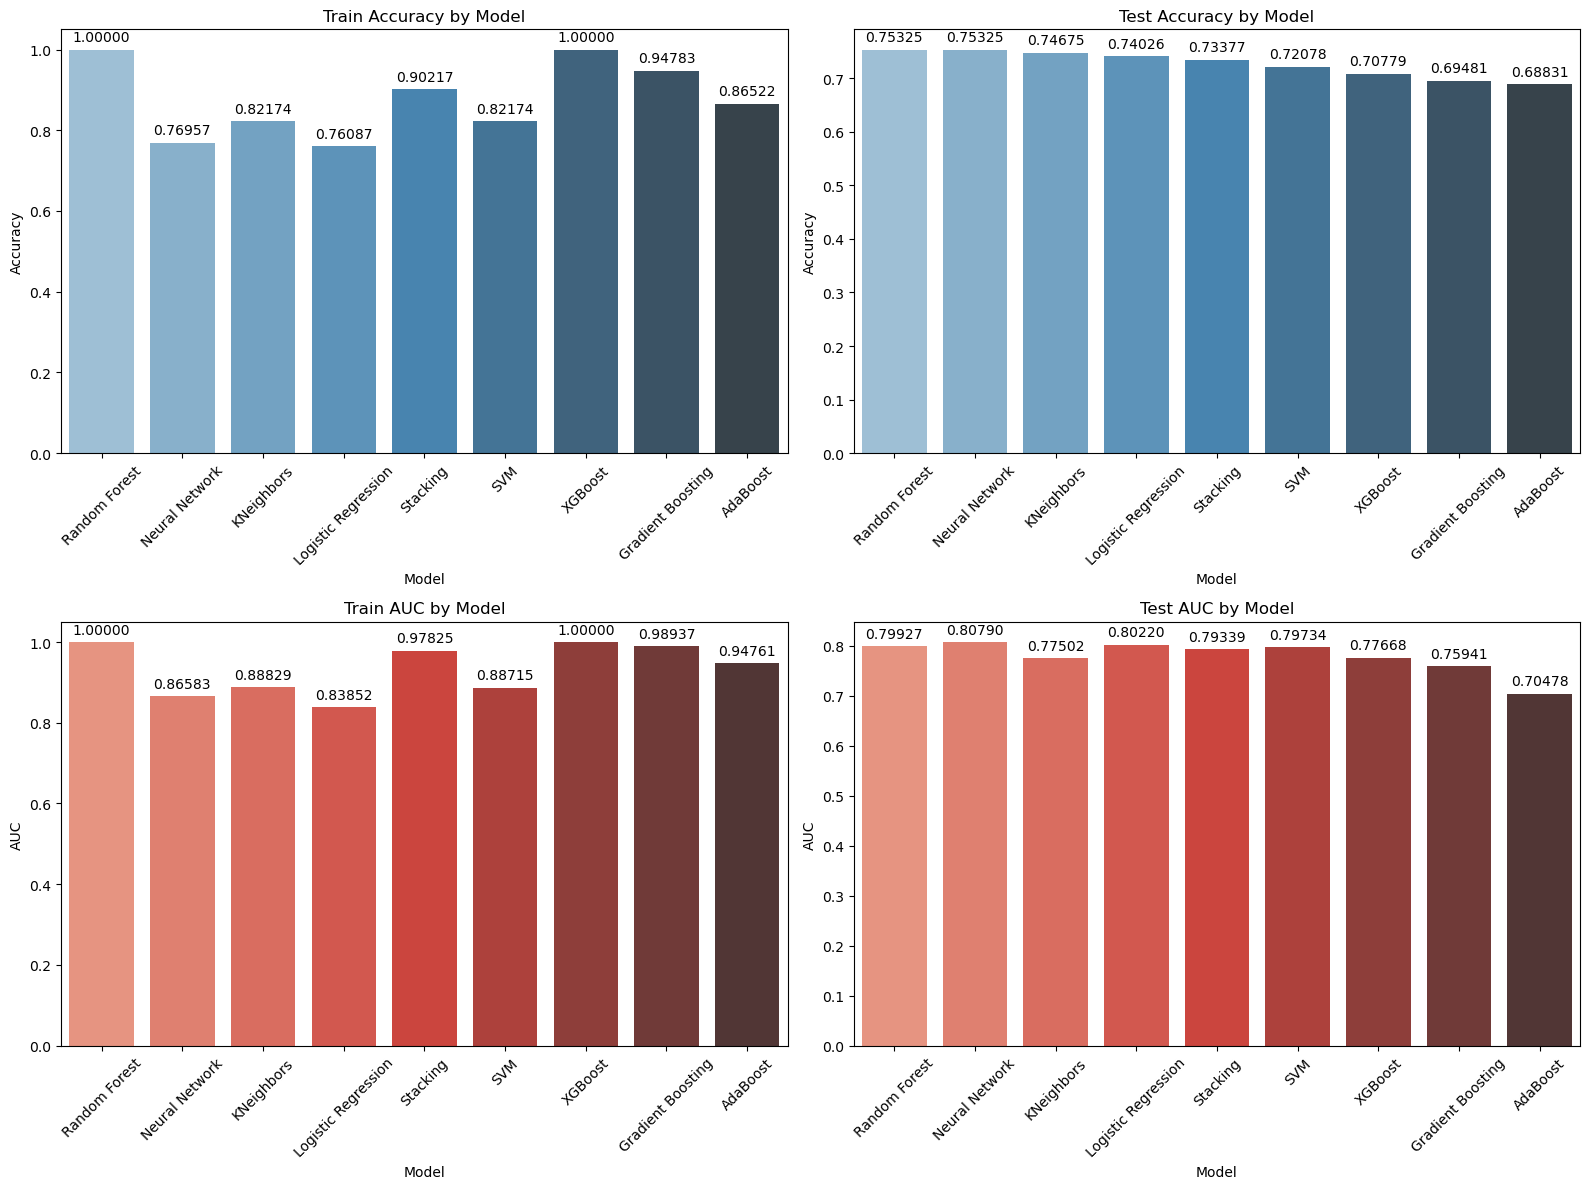

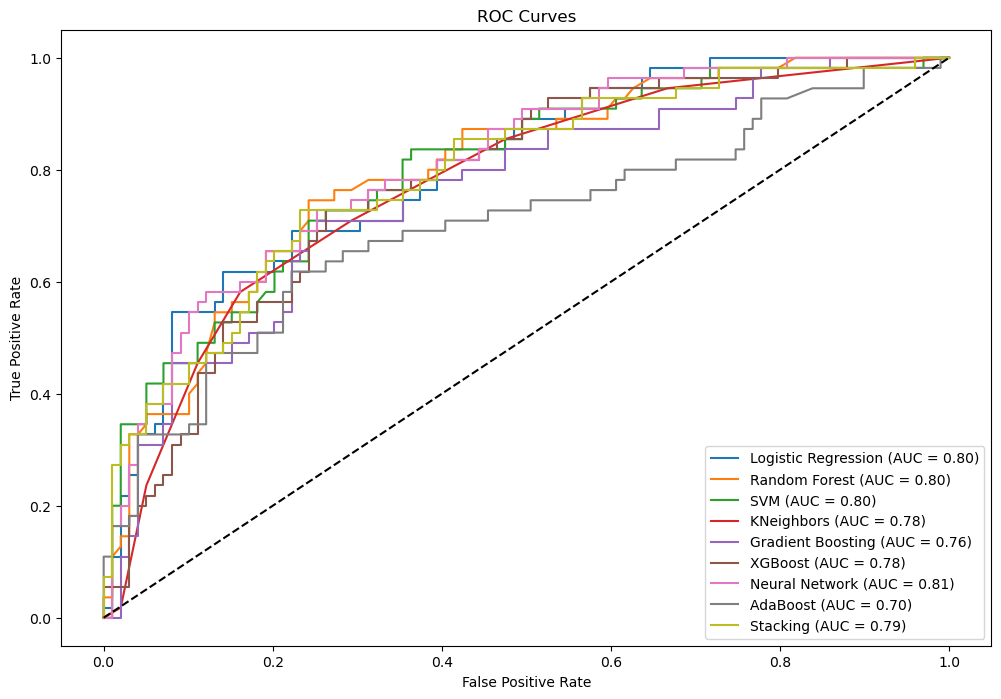

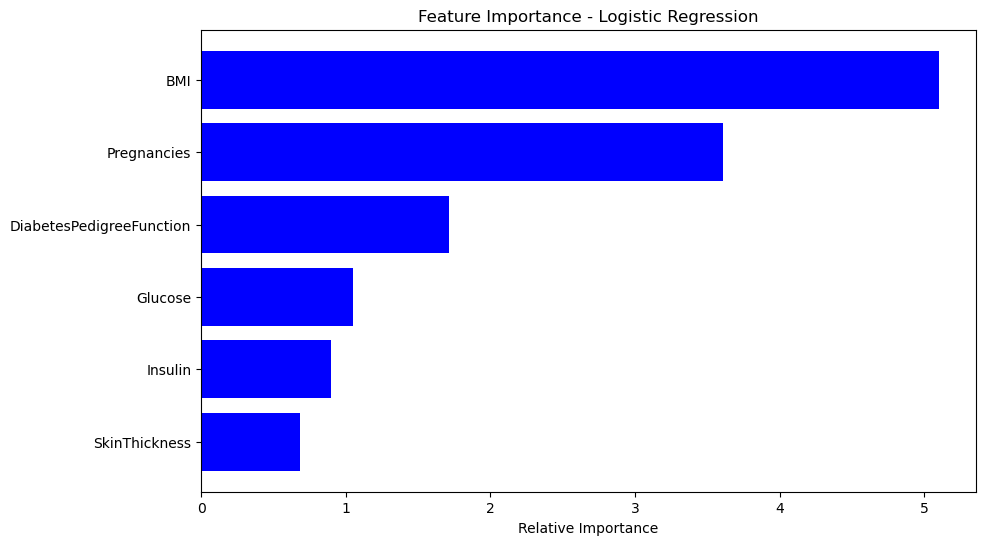

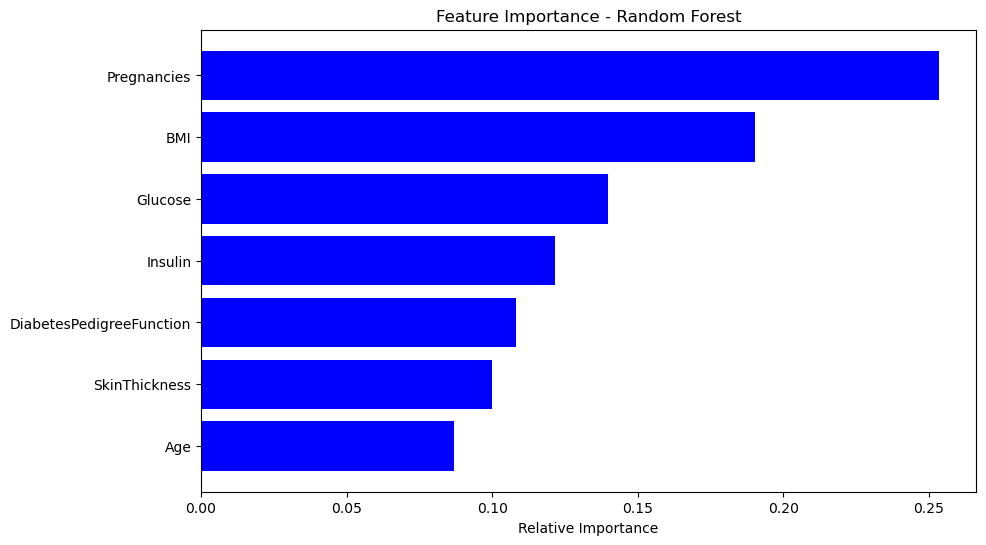

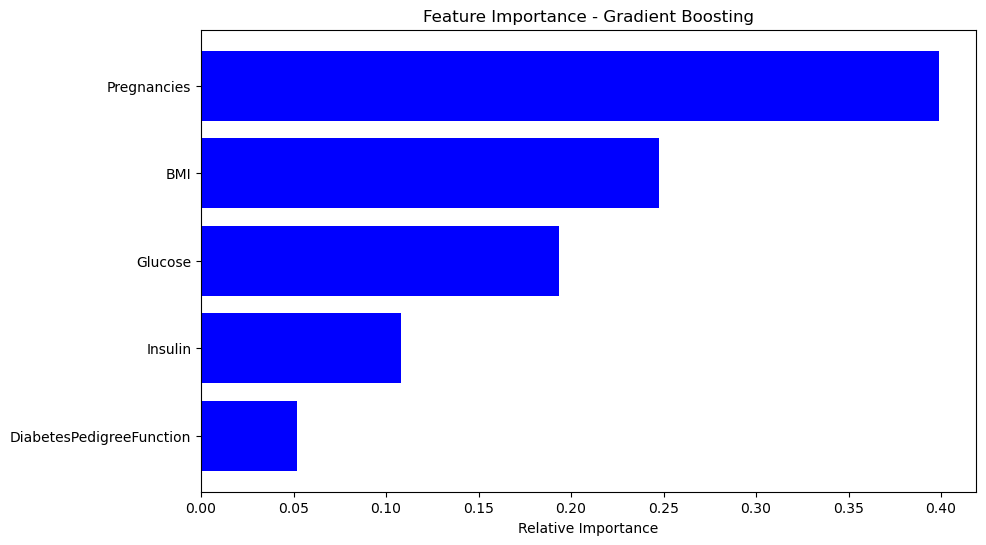

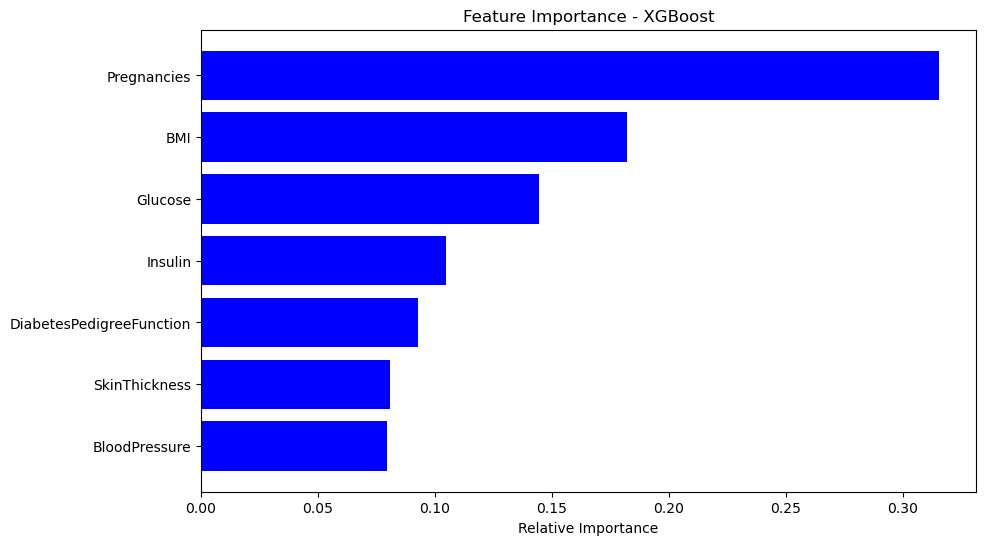

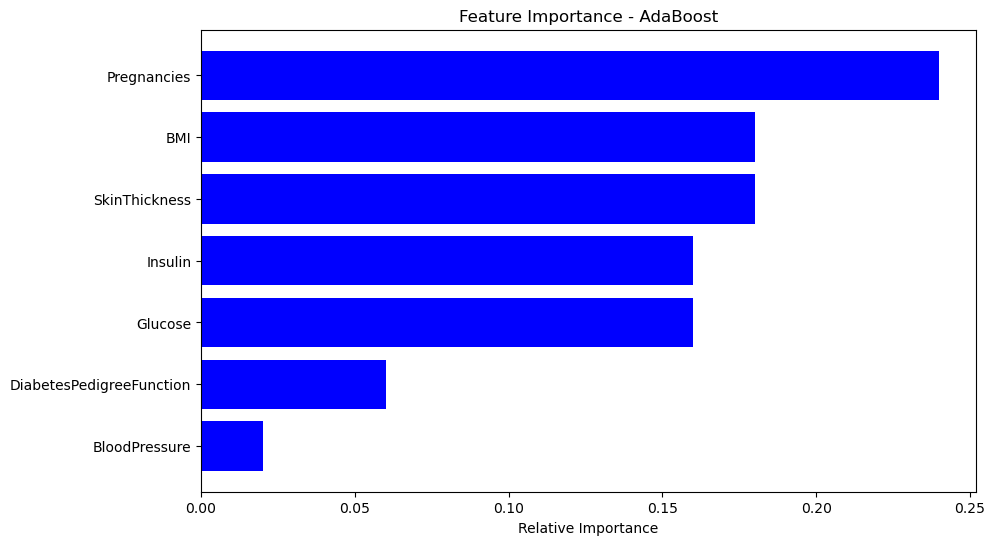

In [32]:
# Modelleri tanımla
models = define_models()



# Modelleri eğit ve değerlendir
results = train_and_evaluate_model(models, X_train, y_train, X_test, y_test)

# Sonuçları görselleştir
plot_results(results)

# ROC eğrilerini görselleştir
plot_roc_curves(models, X_test, y_test)


# Öznitelik önemini görselleştir
plot_feature_importance(models, X_train)





Modelleri 10 kere arka arkaya çalıştırınca ne tarz bir değişim oluyor


--- Logistic Regression ---
Comparing single run vs multiple runs for Logistic Regression...


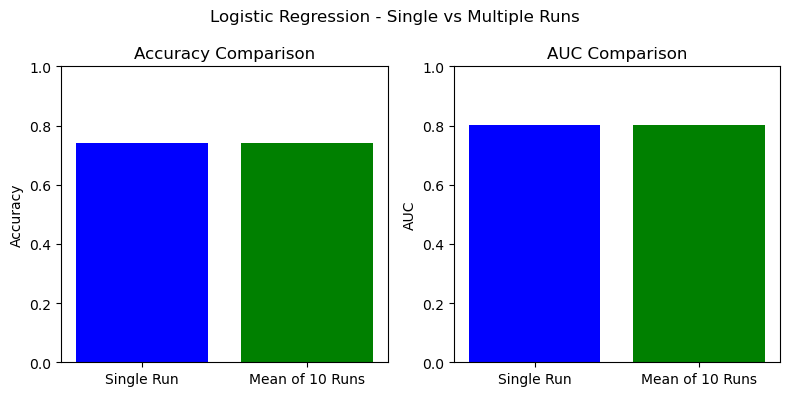

Single Accuracy: 0.7403, Single AUC: 0.8022
Mean Accuracy of 10 Runs: 0.7403 (±0.0000)
Mean AUC of 10 Runs: 0.8022 (±0.0000)

--- Random Forest ---
Comparing single run vs multiple runs for Random Forest...


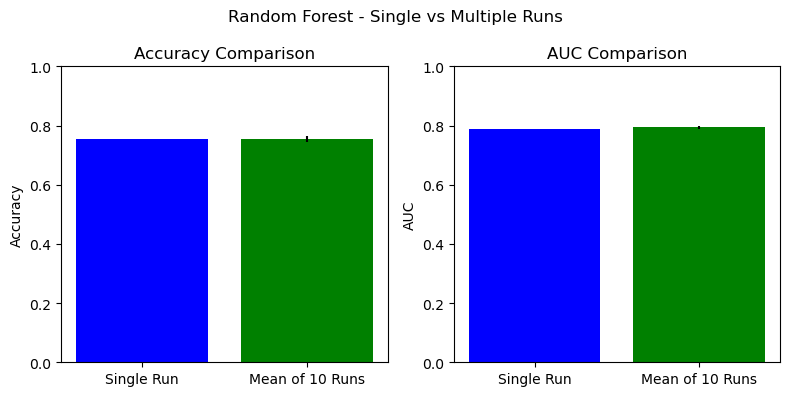

Single Accuracy: 0.7532, Single AUC: 0.7876
Mean Accuracy of 10 Runs: 0.7552 (±0.0097)
Mean AUC of 10 Runs: 0.7939 (±0.0062)

--- SVM ---
Comparing single run vs multiple runs for SVM...


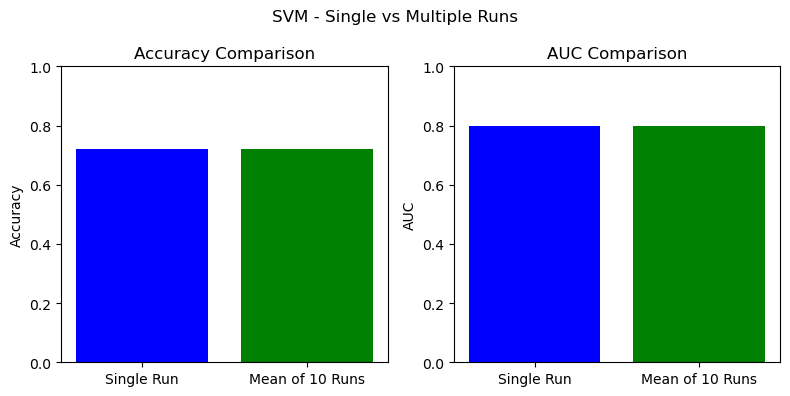

Single Accuracy: 0.7208, Single AUC: 0.7976
Mean Accuracy of 10 Runs: 0.7208 (±0.0000)
Mean AUC of 10 Runs: 0.7974 (±0.0001)

--- KNeighbors ---
Comparing single run vs multiple runs for KNeighbors...


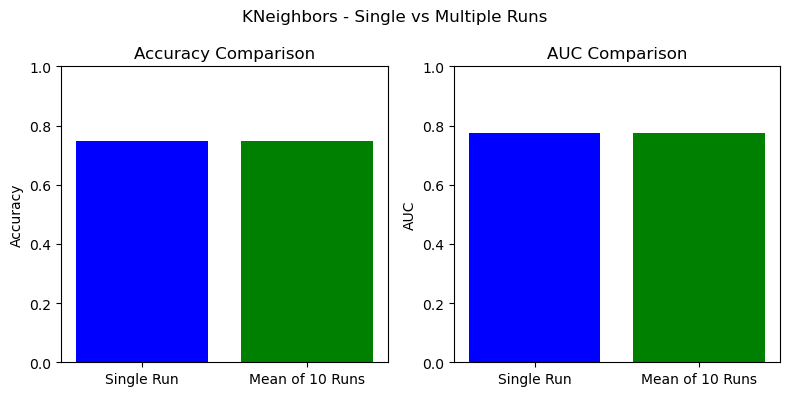

Single Accuracy: 0.7468, Single AUC: 0.7750
Mean Accuracy of 10 Runs: 0.7468 (±0.0000)
Mean AUC of 10 Runs: 0.7750 (±0.0000)

--- Gradient Boosting ---
Comparing single run vs multiple runs for Gradient Boosting...


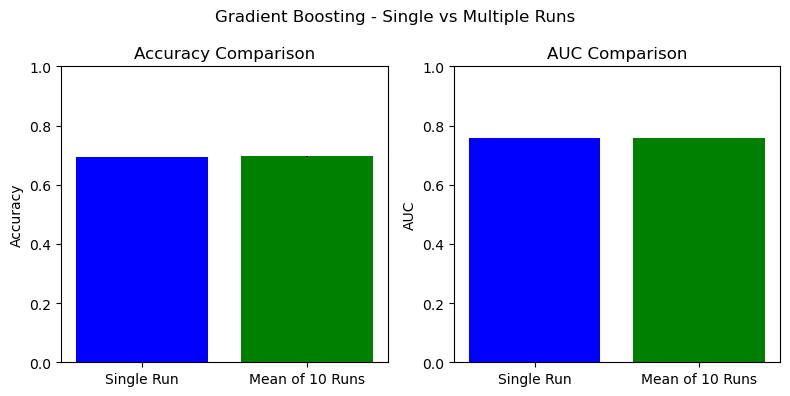

Single Accuracy: 0.6948, Single AUC: 0.7587
Mean Accuracy of 10 Runs: 0.6961 (±0.0026)
Mean AUC of 10 Runs: 0.7577 (±0.0007)

--- XGBoost ---
Comparing single run vs multiple runs for XGBoost...


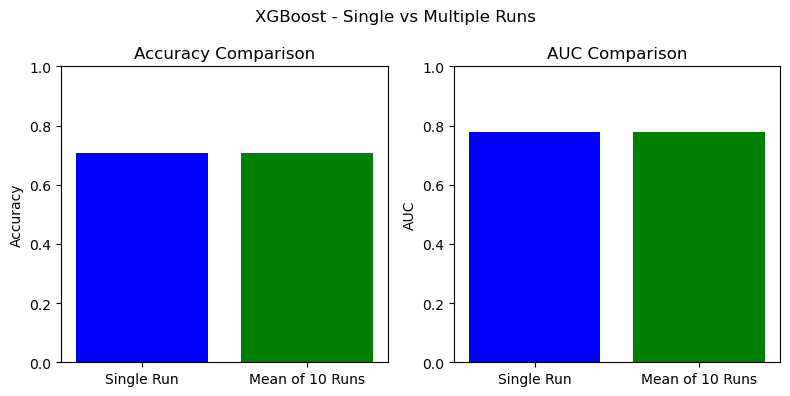

Single Accuracy: 0.7078, Single AUC: 0.7767
Mean Accuracy of 10 Runs: 0.7078 (±0.0000)
Mean AUC of 10 Runs: 0.7767 (±0.0000)

--- Neural Network ---
Comparing single run vs multiple runs for Neural Network...


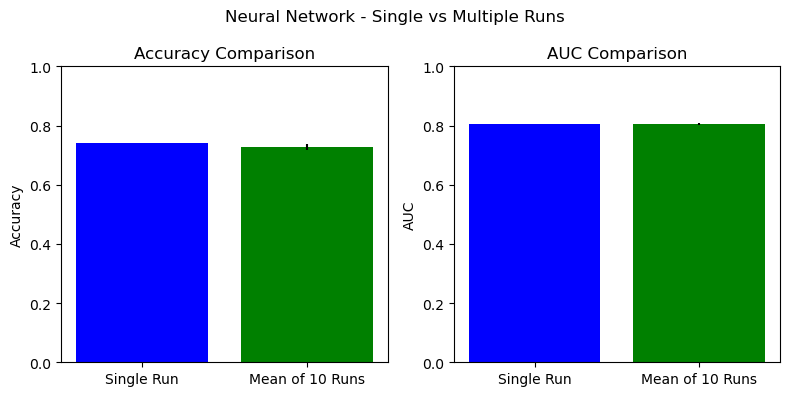

Single Accuracy: 0.7403, Single AUC: 0.8061
Mean Accuracy of 10 Runs: 0.7273 (±0.0109)
Mean AUC of 10 Runs: 0.8048 (±0.0023)

--- AdaBoost ---
Comparing single run vs multiple runs for AdaBoost...


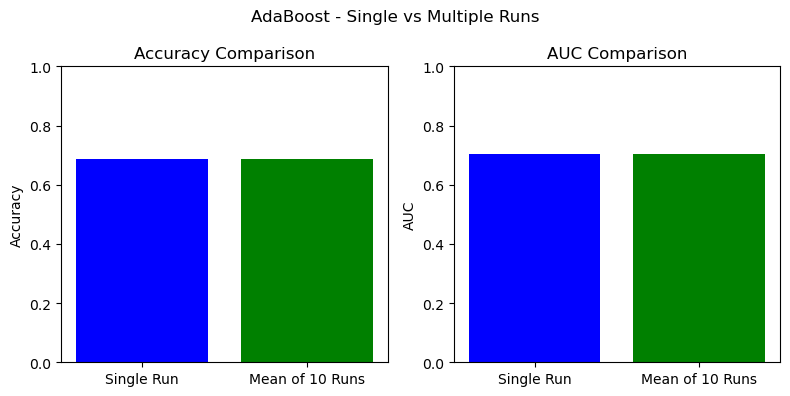

Single Accuracy: 0.6883, Single AUC: 0.7048
Mean Accuracy of 10 Runs: 0.6883 (±0.0000)
Mean AUC of 10 Runs: 0.7048 (±0.0000)

--- Stacking ---
Comparing single run vs multiple runs for Stacking...


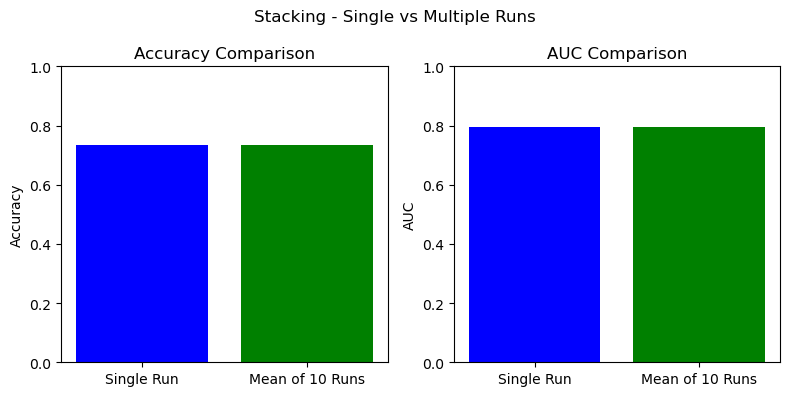

Single Accuracy: 0.7338, Single AUC: 0.7934
Mean Accuracy of 10 Runs: 0.7338 (±0.0000)
Mean AUC of 10 Runs: 0.7934 (±0.0000)


In [27]:

# Modeli birden fazla çalıştırma ve sonuçları kaydetme
def evaluate_model_multiple_times(model, X_train, y_train, X_test, y_test, n_runs=10):
    accuracies = []
    aucs = []
    
    for _ in range(n_runs):
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        accuracies.append(test_accuracy)
        aucs.append(test_auc)
    
    return {
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Mean AUC': np.mean(aucs),
        'Std AUC': np.std(aucs),
        'Accuracies': accuracies,
        'AUCs': aucs
    }

# Tek çalıştırma ile 10 çalıştırma sonuçlarını karşılaştırma
def compare_single_vs_multiple(model_name, model, X_train, y_train, X_test, y_test, n_runs=10):
    print(f"Comparing single run vs multiple runs for {model_name}...")
    
    # Tek çalıştırma sonuçları
    model.fit(X_train, y_train)
    single_accuracy = accuracy_score(y_test, model.predict(X_test))
    single_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Çoklu çalıştırma sonuçları
    multiple_results = evaluate_model_multiple_times(model, X_train, y_train, X_test, y_test, n_runs=n_runs)
    
    # Karşılaştırma grafiği
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    # Accuracy karşılaştırması
    axes[0].bar(['Single Run', f'Mean of {n_runs} Runs'], [single_accuracy, multiple_results['Mean Accuracy']], yerr=[0, multiple_results['Std Accuracy']], color=['blue', 'green'])
    axes[0].set_title('Accuracy Comparison')
    axes[0].set_ylim(0, 1)
    axes[0].set_ylabel('Accuracy')
    
    # AUC karşılaştırması
    axes[1].bar(['Single Run', f'Mean of {n_runs} Runs'], [single_auc, multiple_results['Mean AUC']], yerr=[0, multiple_results['Std AUC']], color=['blue', 'green'])
    axes[1].set_title('AUC Comparison')
    axes[1].set_ylim(0, 1)
    axes[1].set_ylabel('AUC')
    
    plt.suptitle(f'{model_name} - Single vs Multiple Runs')
    plt.tight_layout()
    plt.show()

    # Çoklu çalıştırma detayları
    print(f"Single Accuracy: {single_accuracy:.4f}, Single AUC: {single_auc:.4f}")
    print(f"Mean Accuracy of {n_runs} Runs: {multiple_results['Mean Accuracy']:.4f} (±{multiple_results['Std Accuracy']:.4f})")
    print(f"Mean AUC of {n_runs} Runs: {multiple_results['Mean AUC']:.4f} (±{multiple_results['Std AUC']:.4f})")



# Tüm modeller için tek çalıştırma ve çoklu çalıştırma karşılaştırması
def compare_all_models(models, X_train, y_train, X_test, y_test, n_runs=10):
    for model_name, model in models.items():
        print(f"\n--- {model_name} ---")
        compare_single_vs_multiple(model_name, model, X_train, y_train, X_test, y_test, n_runs)

# Örneğin, modelleri tanımladıktan sonra hepsi için karşılaştırma yapabilirsiniz:
compare_all_models(models, X_train, y_train, X_test, y_test, n_runs=10)


Rastgele test girdileri üzerinde tahmin yapma ve başarı oranını hesaplama

In [28]:
def predict_random_test_samples(models, X_test, y_test, num_samples=5):
    random_indices = np.random.choice(X_test.index, size=num_samples, replace=False)
    sample_data = X_test.loc[random_indices]
    sample_labels = y_test.loc[random_indices]
    
    predictions = {}
    for model_name, model in models.items():
        print(f"\n--- Predictions using {model_name} ---")
        preds = model.predict(sample_data)
        correct_count = np.sum(preds == sample_labels.values)
        accuracy = correct_count / num_samples
        preds_proba = model.predict_proba(sample_data)[:, 1] if hasattr(model, "predict_proba") else ["N/A"] * num_samples
        
        for i in range(num_samples):
            print(f"Sample {i + 1}: True Label = {sample_labels.iloc[i]}, Prediction = {preds[i]}, Probability = {preds_proba[i]:.4f}")
        
        print(f"Correct Predictions: {correct_count}/{num_samples} ({accuracy * 100:.2f}%)")
        
        predictions[model_name] = {
            'True Labels': sample_labels.values,
            'Predictions': preds,
            'Probabilities': preds_proba,
            'Correct Count': correct_count,
            'Accuracy': accuracy
        }
    
    return predictions

predictions = predict_random_test_samples(models, X_test, y_test, num_samples=10)



--- Predictions using Logistic Regression ---
Sample 1: True Label = 1, Prediction = 1, Probability = 0.5798
Sample 2: True Label = 0, Prediction = 0, Probability = 0.4253
Sample 3: True Label = 1, Prediction = 1, Probability = 0.7090
Sample 4: True Label = 0, Prediction = 1, Probability = 0.6134
Sample 5: True Label = 1, Prediction = 0, Probability = 0.1773
Sample 6: True Label = 0, Prediction = 0, Probability = 0.3152
Sample 7: True Label = 0, Prediction = 1, Probability = 0.5088
Sample 8: True Label = 0, Prediction = 0, Probability = 0.0603
Sample 9: True Label = 0, Prediction = 0, Probability = 0.0810
Sample 10: True Label = 1, Prediction = 1, Probability = 0.8868
Correct Predictions: 7/10 (70.00%)

--- Predictions using Random Forest ---
Sample 1: True Label = 1, Prediction = 1, Probability = 0.8650
Sample 2: True Label = 0, Prediction = 0, Probability = 0.4400
Sample 3: True Label = 1, Prediction = 1, Probability = 0.7750
Sample 4: True Label = 0, Prediction = 1, Probability = 0

Neural Network için train test accuracy ve loss 

Epoch 10/100 - Train Accuracy: 0.6522, Test Accuracy: 0.6429
Epoch 20/100 - Train Accuracy: 0.6674, Test Accuracy: 0.6364
Epoch 30/100 - Train Accuracy: 0.6870, Test Accuracy: 0.6299
Epoch 40/100 - Train Accuracy: 0.7109, Test Accuracy: 0.6558
Epoch 50/100 - Train Accuracy: 0.7326, Test Accuracy: 0.6818
Epoch 60/100 - Train Accuracy: 0.7478, Test Accuracy: 0.7078
Epoch 70/100 - Train Accuracy: 0.7565, Test Accuracy: 0.7403
Epoch 80/100 - Train Accuracy: 0.7609, Test Accuracy: 0.7532
Epoch 90/100 - Train Accuracy: 0.7674, Test Accuracy: 0.7662
Epoch 100/100 - Train Accuracy: 0.7717, Test Accuracy: 0.7597


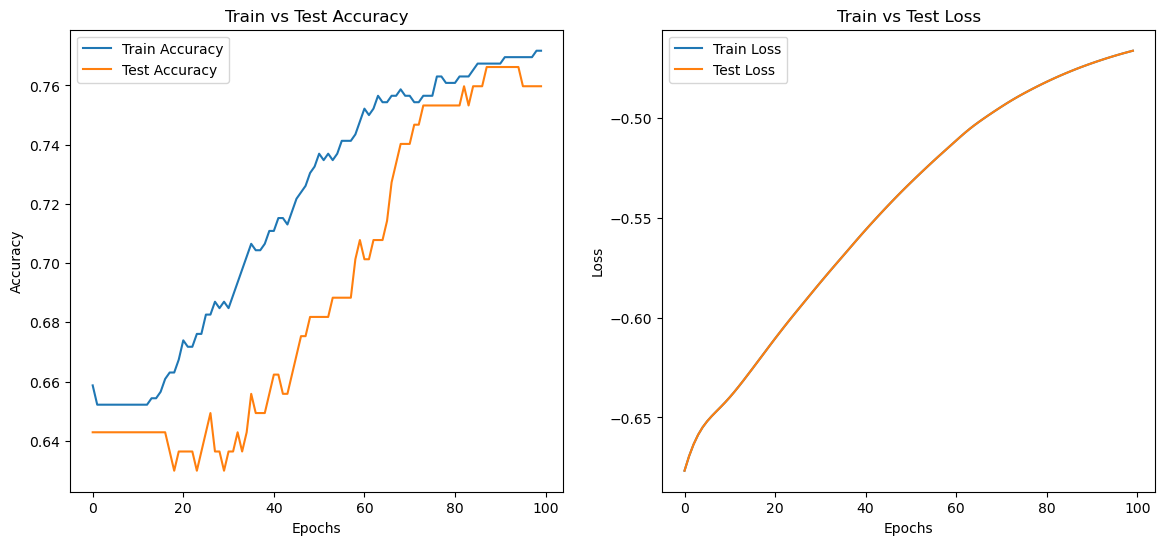

In [29]:
def plot_train_test_accuracy_loss(history):
    

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Accuracy plot
    ax1.plot(history['train_accuracy'], label='Train Accuracy')
    ax1.plot(history['test_accuracy'], label='Test Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Train vs Test Accuracy')
    ax1.legend()

    # Loss plot
    ax2.plot(history['train_loss'], label='Train Loss')
    ax2.plot(history['test_loss'], label='Test Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_title('Train vs Test Loss')
    ax2.legend()

    plt.show()

def train_deep_learning_model(model, X_train, y_train, X_test, y_test, epochs=100):
    
    history = {
        'train_accuracy': [],
        'test_accuracy': [],
        'train_loss': [],
        'test_loss': []
    }

    for epoch in range(epochs):
        # Modeli eğit
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))

        # Train ve Test tahminleri
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Train/Test Accuracy
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Train/Test Loss (negative log loss)
        train_loss = -model.loss_
        test_loss = -model.loss_

        # History'e ekle
        history['train_accuracy'].append(train_acc)
        history['test_accuracy'].append(test_acc)
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)

        # Her 10 epoch'ta bir bilgi yazdırma
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

    # Train ve Test doğruluk ve kayıplarını görselleştir
    plot_train_test_accuracy_loss(history)

    return model, history

# Modeli eğit ve doğruluk/kayıp grafiğini göster
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42)
mlp_model, history = train_deep_learning_model(mlp_model, X_train, y_train, X_test, y_test, epochs=100)

Confusion Matrix'i hesaplayıp görselleştirme fonksiyonu



--- Confusion Matrix for Logistic Regression ---


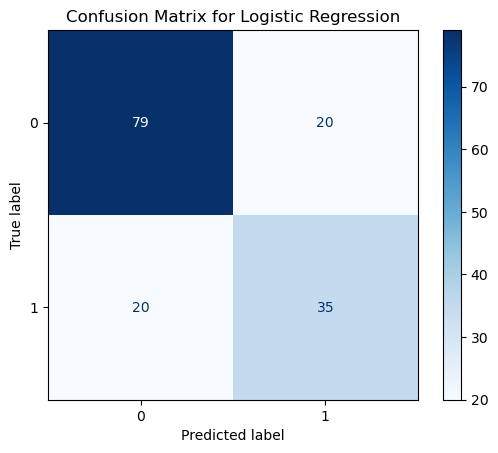


--- Confusion Matrix for Random Forest ---


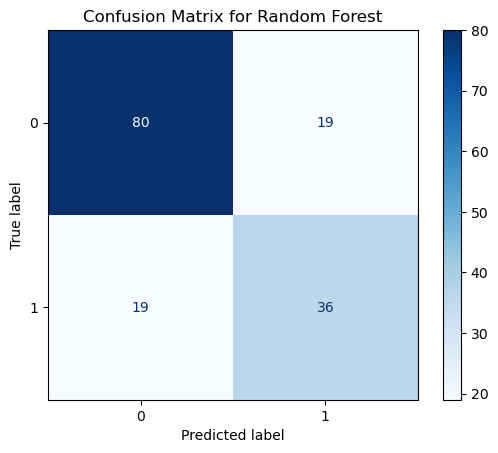


--- Confusion Matrix for SVM ---


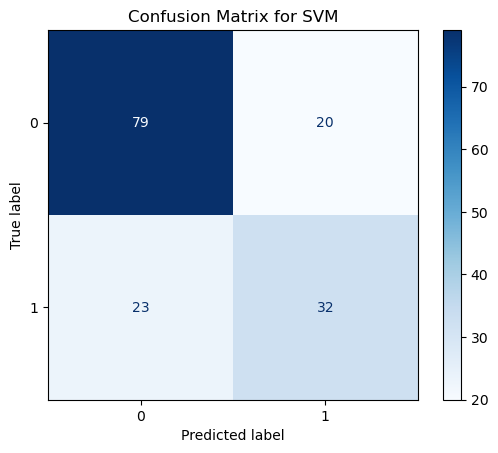


--- Confusion Matrix for KNeighbors ---


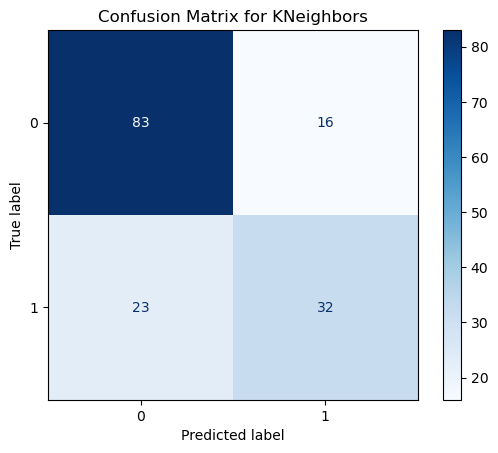


--- Confusion Matrix for Gradient Boosting ---


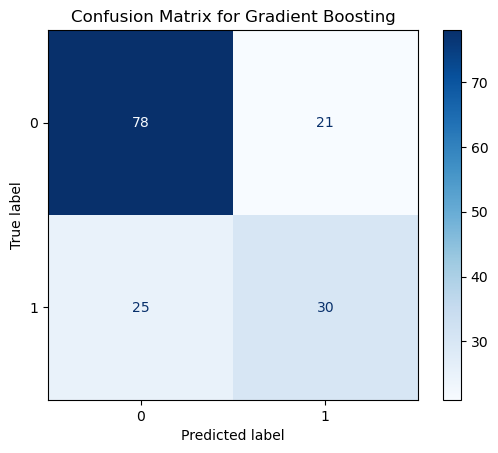


--- Confusion Matrix for XGBoost ---


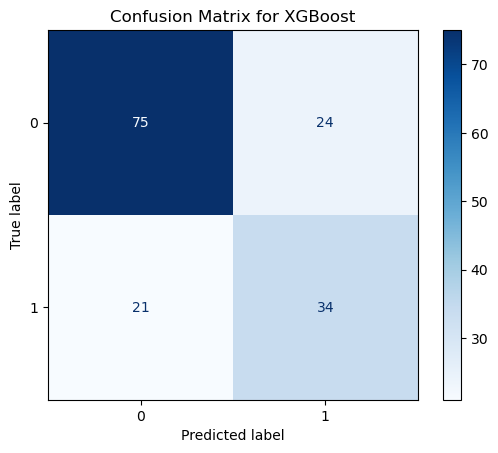


--- Confusion Matrix for Neural Network ---


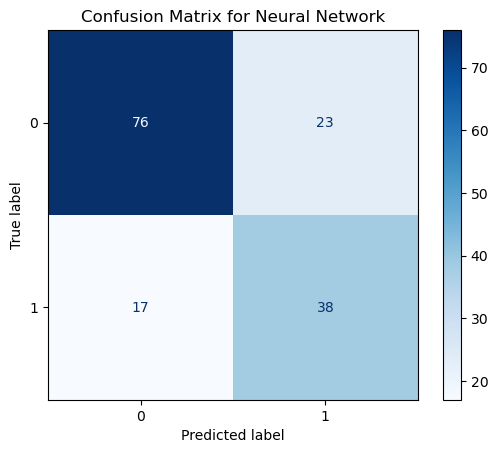


--- Confusion Matrix for AdaBoost ---


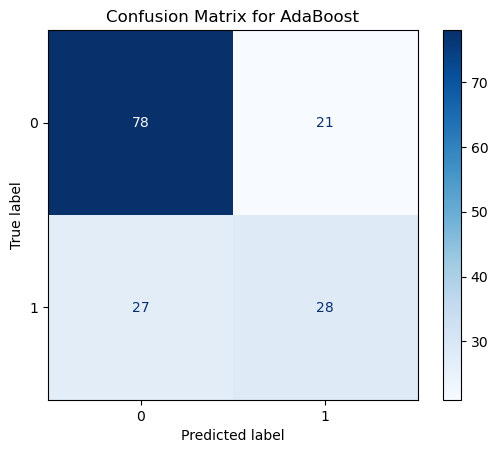


--- Confusion Matrix for Stacking ---


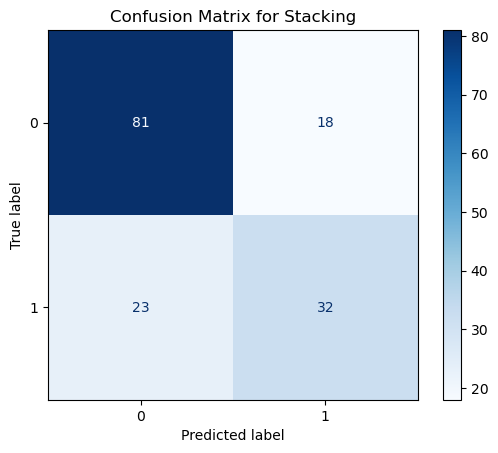

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay


def plot_confusion_matrix_for_models(models, X_test, y_test):
    for model_name, model in models.items():
        print(f"\n--- Confusion Matrix for {model_name} ---")
        y_pred = model.predict(X_test)
        
        # Confusion Matrix oluşturma
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        
        # Confusion Matrix'i görselleştirme
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

plot_confusion_matrix_for_models(models, X_test, y_test)